# House Price Prediction Project

### Introducción.

Este proyecto se centra en la predicción de los precios de las viviendas utilizando técnicas de Machine Learning. Para ello, se ha utilizado un conjunto de datos que contiene información sobre diversas características de las viviendas, como la superficie, el número de dormitorios y baños, el tamaño del lote, la calidad del vecindario, entre otros. El objetivo principal es construir un modelo que permita predecir el valor de las viviendas con una alta precisión, proporcionando una herramienta útil para evaluar el valor de las propiedades en el mercado inmobiliario.

El análisis comienza con un estudio exploratorio de datos (EDA) para comprender la estructura y distribución de las variables. Posteriormente, se dividen los datos en conjuntos de entrenamiento, validación y prueba, y se realiza la estandarización de las características para asegurar que todos los valores estén en un rango comparable. Se entrena un modelo de regresión lineal y se evalúa su rendimiento utilizando métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R²), logrando un ajuste preciso del modelo a los datos.

El proyecto busca ofrecer una solución efectiva para estimar el precio de las viviendas, que pueda ser aplicada tanto por compradores como vendedores, así como por empresas del sector inmobiliario que busquen mejorar sus procesos de tasación de propiedades.

### Inicialización y Carga de Datos. 

Primero procedemos a importar las distintas Librerías:

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [4]:
# Cargamos el conjunto de datos:
df = pd.read_csv('/Users/eruggeri/Pythons_Projects/House Price_Project/house_price_regression_dataset.csv') # leer los datos

### Análisis Exploratorio de Datos.

In [3]:
# Imprimimos la información general/resumida sobre el DataFrame contract.
df.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(df.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB
----------
   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1    

In [6]:
# Comprobar valores faltantes
print(df.isnull().sum())

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


Comprobamos que no existen valores faltantes.

In [9]:
# Comprobar si hay filas completamente repetidas
num_duplicated_rows = df.duplicated(keep=False).sum()
print(f"Número de filas duplicadas: {num_duplicated_rows}")


Número de filas duplicadas: 0


Comprobamos que no existen filas totalmente duplicadas.

In [7]:
# Descripción estadística
print(df.describe())

       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000              1.000000  1.116269e

Como resultado de las descripción estad´sitica podemos indicar que:
  - Superficie Construida (Square_Footage): La media es de 2815.42 pies cuadrados con una desviación estándar de 1255.51, indicando una gran variabilidad en el tamaño de las casas, desde 503 hasta 4999 pies cuadrados.
  - Número de Dormitorios (Num_Bedrooms): Las casas tienen entre 1 y 5 dormitorios, siendo el valor medio aproximadamente 3. La mayor parte de las casas tienen entre 2 y 4 dormitorios.
  - Número de Baños (Num_Bathrooms): Hay de 1 a 3 baños por vivienda, con una mediana de 2, lo que indica que la mayoría de las casas tienen 2 baños.
  - Año de Construcción (Year_Built): La mayoría de las casas fueron construidas entre 1969 y 2004, con un año medio de 1986.
  - Tamaño del Lote (Lot_Size): El tamaño de los lotes varía considerablemente, con un valor medio de 2.78 acres, y el rango se extiende desde 0.5 hasta casi 5 acres.
  - Tamaño del Garaje (Garage_Size): Las viviendas tienen entre 0 y 2 espacios de garaje, con un promedio ligeramente superior a 1.
  - Calidad del Vecindario (Neighborhood_Quality): Esta variable se mide en una escala de 1 a 10, con una media de 5.62, lo que sugiere que la mayoría de las viviendas se encuentran en vecindarios de calidad media.
  - Precio de la Vivienda (House_Price): El precio medio de las viviendas es de $618,861, con una gran variabilidad que va desde $111,626 hasta $1,108,237.

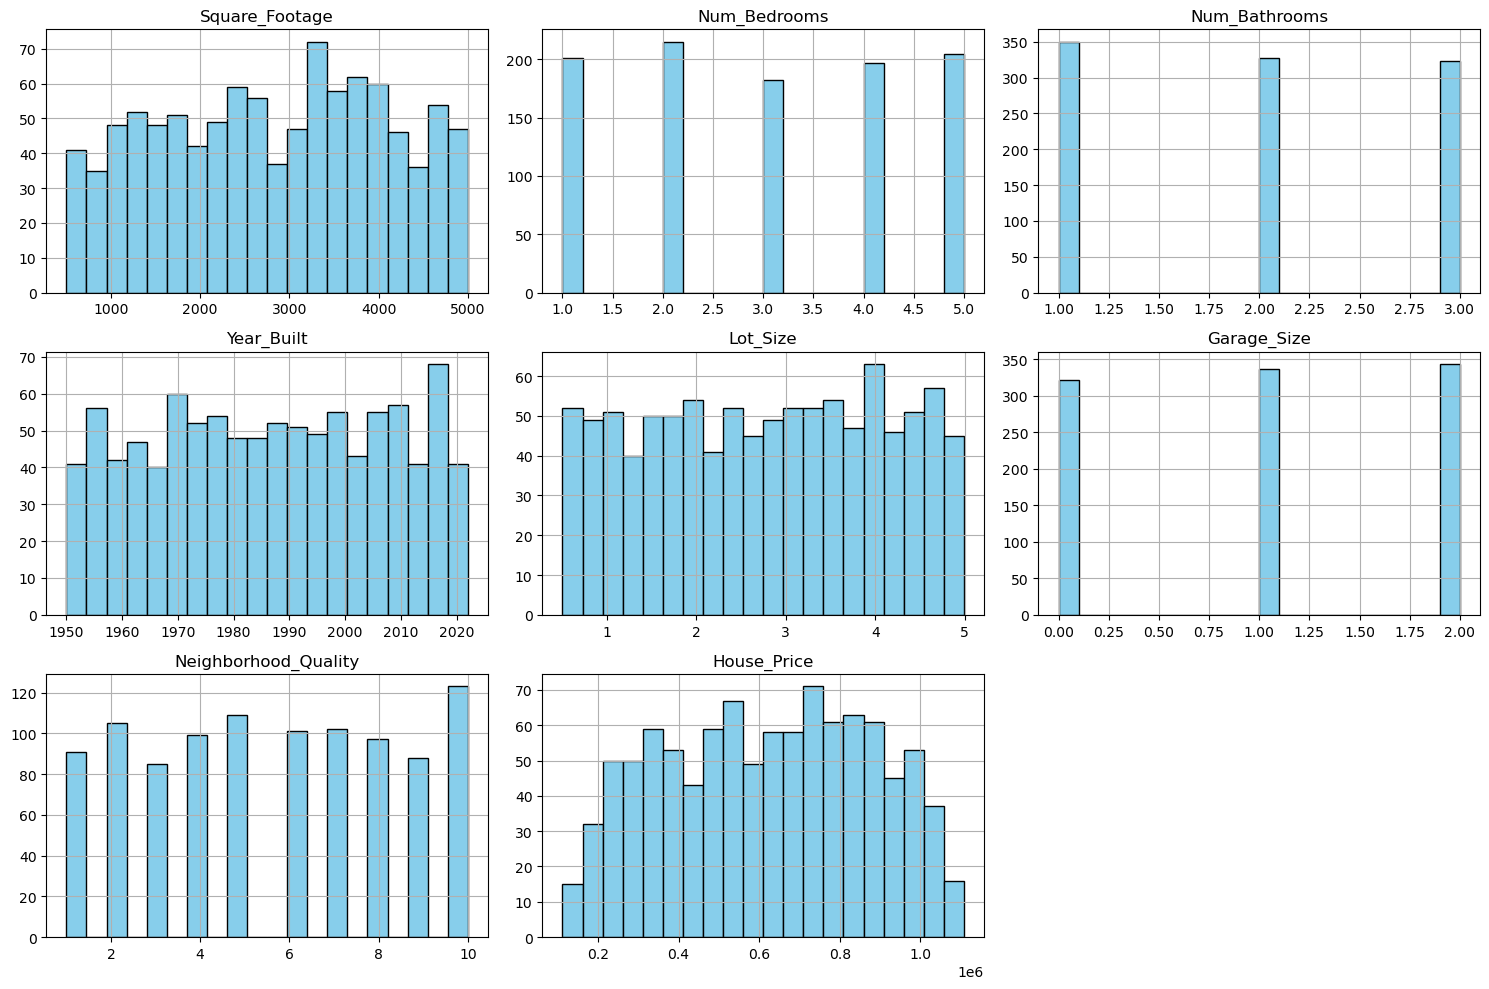

In [11]:
# Crear histogramas para las variables numéricas
numerical_columns = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price']
df[numerical_columns].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


En base al análisis de los histogramas podemos comentar que: 
Gracias por compartir los histogramas. Aquí tienes algunos comentarios sobre las distribuciones observadas:

  - Square_Footage: La distribución parece bastante uniforme, lo cual sugiere una gran variedad de tamaños de viviendas en el conjunto de datos. No hay un sesgo evidente.
  - Num_Bedrooms y Num_Bathrooms: Ambas variables muestran una distribución bastante homogénea, con una cantidad similar de viviendas para cada número de dormitorios y baños. Esto implica que no hay un predominio de un tipo de casa en particular, lo que puede ser útil para generalizar los resultados del análisis.
  - Year_Built: Vemos una distribución razonablemente uniforme, aunque hay un aumento en la cantidad de viviendas construidas en años más recientes (2010-2022). Esto sugiere una concentración de propiedades relativamente nuevas.
  - Lot_Size: La distribución también parece estar bastante equilibrada. Sin embargo, hay un ligero aumento en el número de lotes grandes, en torno a 4 acres.
  - Garage_Size: La mayoría de las viviendas tienen 1 o 2 espacios de garaje, mientras que una parte significativa de las viviendas no tienen garaje. Este tipo de distribución puede ser relevante al modelar el valor de la vivienda.
  - Neighborhood_Quality: La calidad del vecindario está bien distribuida entre los diferentes niveles, con una mayor cantidad de casas en vecindarios de calidad alta (nivel 10). Esto podría influir positivamente en el valor de la vivienda.
  - House_Price: La distribución del precio de las viviendas parece tener una forma algo normal, pero con una ligera concentración en los precios intermedios ($400,000 a $800,000). Esto indica que la mayoría de las viviendas tienen precios en un rango medio, con menos viviendas en los extremos.

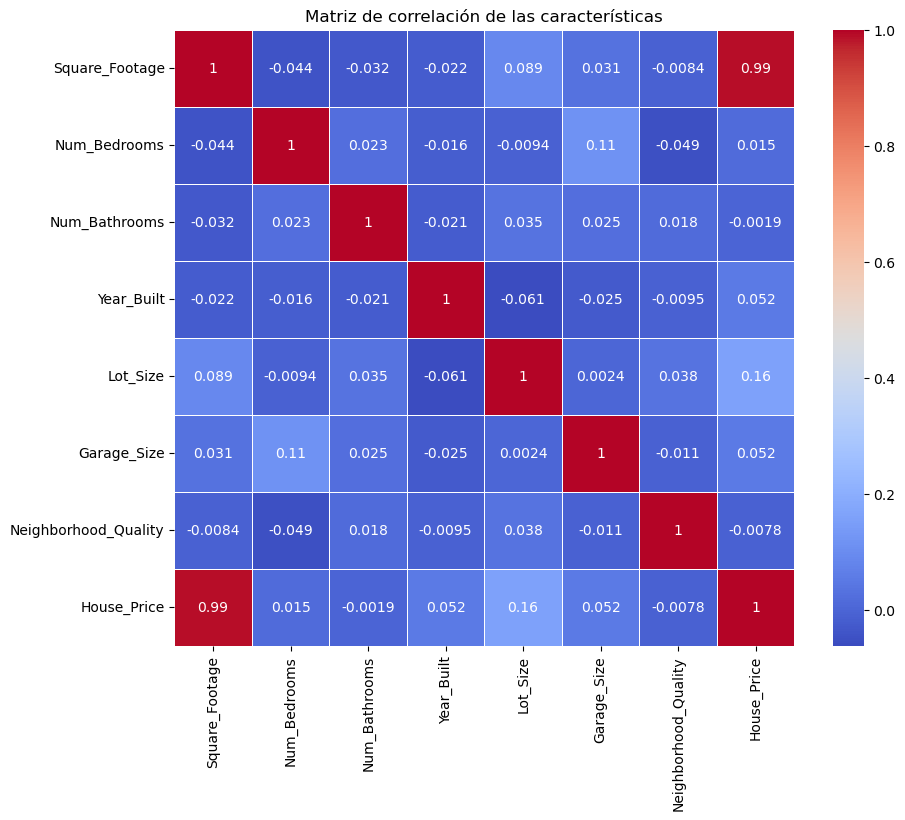

In [14]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de las características')
plt.show()


Podemos indicar los siguientes comentarios sobre la matriz de correlación:

  - Square_Footage y House_Price: Existe una correlación muy alta (0.99) entre el tamaño de la vivienda (Square_Footage) y el precio de la vivienda (House_Price). Esto indica que el tamaño de la vivienda es un predictor clave para el valor de la misma.
  - Lot_Size y House_Price: La correlación entre el tamaño del lote (Lot_Size) y el precio de la vivienda es de 0.16. Aunque es positiva, no es muy fuerte, pero podría tener cierta influencia.
  - Resto de las características: Las otras variables como Num_Bedrooms, Num_Bathrooms, Year_Built, Garage_Size, y Neighborhood_Quality tienen correlaciones muy bajas con el precio de la vivienda, lo que indica que podrían no tener una gran influencia directa en la predicción del valor de la vivienda. Sin embargo, podríamos explorar interacciones entre variables.

### Preprocesamiento del Conjunto de Datos

In [17]:
# Separar características y variable objetivo
X = df.drop(columns=['House_Price'])
y = df['House_Price']

# Dividir en conjunto de entrenamiento (60%) y conjunto de validación y prueba (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Dividir el conjunto temporal (X_temp) en conjunto de validación (20%) y conjunto de prueba (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verificar los tamaños de los conjuntos de datos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño del conjunto de validación: {X_val.shape[0]} muestras')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} muestras')

Tamaño del conjunto de entrenamiento: 600 muestras
Tamaño del conjunto de validación: 200 muestras
Tamaño del conjunto de prueba: 200 muestras


In [18]:

# Estandarizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convertir los datos escalados nuevamente a DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)


### Modelo de Regresión Lineal

In [21]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f'Error cuadrático medio (MSE) en el conjunto de validación: {mse:.2f}')
print(f'Coeficiente de determinación (R²) en el conjunto de validación: {r2:.2f}')


Error cuadrático medio (MSE) en el conjunto de validación: 107161973.87
Coeficiente de determinación (R²) en el conjunto de validación: 1.00


In [23]:
# Evaluar el modelo en el conjunto de prueba con 4 decimales
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Error cuadrático medio (MSE) en el conjunto de prueba: {mse_test:.2f}')
print(f'Coeficiente de determinación (R²) en el conjunto de prueba: {r2_test:.4f}')


Error cuadrático medio (MSE) en el conjunto de prueba: 91352312.77
Coeficiente de determinación (R²) en el conjunto de prueba: 0.9986


Los resultados muestran que:

Error Cuadrático Medio (MSE) en el conjunto de prueba: El valor obtenido (91,352,312.77) es relativamente similar al MSE en el conjunto de validación, lo cual sugiere consistencia en el rendimiento del modelo.


El Coeficiente de determinación (R²) de 0.9986 sugiere que el modelo ajusta extremadamente bien los datos de prueba, explicando casi toda la variabilidad del precio de la vivienda. Esto indica que el modelo es bastante preciso, pero también existe el riesgo de un posible sobreajuste.



### Conclusiones Generales

En base al análisis realizado en el desarrollo del proyecto, podemos indicar que:

Error Cuadrático Medio (MSE):
  - Es una métrica que mide el promedio de los errores al cuadrado entre los valores reales y las predicciones del modelo.
  - Un MSE más bajo indica un modelo que hace predicciones más cercanas a los valores reales. Dado que los errores se elevan al cuadrado, valores más grandes tienen un impacto mayor, lo cual puede destacar grandes errores.
  - En la práctica, se utiliza para saber cuán lejos están nuestras predicciones del valor real. Al estar en la misma escala que la variable objetivo (aunque elevada al cuadrado), nos ayuda a tener una idea de la magnitud de los errores.

Coeficiente de Determinación (R²):
  - Indica la proporción de la variabilidad en la variable objetivo (y) que es explicada por el modelo.
  - Su valor oscila entre 0 y 1 (o incluso valores negativos si el modelo es muy deficiente). Un valor cercano a 1 significa que el modelo explica casi toda la variabilidad de los datos, mientras que un valor cercano a 0 indica un bajo poder explicativo.
  - En la práctica, R² nos ayuda a entender qué tan bien el modelo se ajusta a los datos. Si es cercano a 1, significa que el modelo predice con bastante precisión el comportamiento del objetivo. Un R² alto como el que tenemos (0.9986) sugiere que el modelo está capturando la mayoría de la variación en los datos, lo cual podría ser positivo, pero también debemos tener cuidado con posibles problemas de sobreajuste.

Estas métricas juntas nos permiten evaluar cuán precisas son nuestras predicciones (MSE) y qué tan bien el modelo está capturando la relación subyacente entre las características y el objetivo (R²). 